**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*4_Model_Selection_Neural_Networks* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: March 1, 2020 <br>
Date Updated: March 1, 2020

----

**Note: This needs to be run from the tfcs109a Conda Environment**

**Model Selection Strategy** <br>
1. Lasso <br>
2. Random Forest <br>
3. Neural Networks

**Load Packages**

In [45]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import json
import requests
import numpy as np
import math

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz
import pydot

import statsmodels.formula.api as sm
from pprint import pprint

import itertools

----

**Load Data**

In [2]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [3]:
# Load In Sample

in_sample = pd.read_csv('../../2_Inputs/Final/in_sample.csv')
in_sample = in_sample.drop(["Unnamed: 0"], axis = 1)
in_sample.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,61.736799,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.058401,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,63.873800,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.003000,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007


In [4]:
# Load Lock Box

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Labor.force.participation.rate..total....of.total.population.ages.15.64...modeled.ILO.estimate.,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,66.914001,57.110746,1.679,52807.2,28.60,63.377000,4.9760,2.478662,24.50,-1.117563
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.268997,58.104539,1.634,18138.6,29.50,63.763000,4.8000,2.519923,15.06,-1.039843
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.606003,59.008129,1.559,-314602.0,29.80,64.130000,4.6330,2.554251,15.06,-0.992470
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.686996,59.244647,1.542,52807.2,27.86,69.075083,2.1800,2.584927,15.06,-0.994720
4,Afghanistan,2019.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,67.772003,59.479106,1.519,26108.8,3.68,66.443400,3.9094,8.794946,14.66,0.853073


In [5]:
# Load Validation Table

results = pd.read_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 2.csv')
results = results.drop(["Unnamed: 0"], axis = 1)
results.head()

,Model Name,Model Type,Minimum RMSE,Variables
0,Linear Regression,Linear Model,20021.89,2313
1,Ridge Regression,Linear Model,12131.99,2310
2,Lasso Regression,Linear Model,462.40,986
3,Random Forest,Tree-Based,143.22,2310


----

**Prerequisites**

In [18]:
in_sample.loc[:,'longitude':].shape

(11935, 2314)

In [20]:
# Xs

Xs = in_sample.loc[:,'longitude':]
Xs = Xs.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
Xs.shape

(11935, 2313)

In [22]:
# y

y = in_sample['Foreign direct investment, net inflows (% of GDP)']
y.shape

(11935,)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(in_sample.loc[:,'longitude':], in_sample.loc[:,'Foreign direct investment, net inflows (% of GDP)'], test_size=0.2, random_state=13)

In [24]:
X_train = X_train.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)
X_test = X_test.drop(['Foreign direct investment, net inflows (% of GDP)'], axis = 1)

In [25]:
# Check Dimensions

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9548, 2313)
(9548,)
(2387, 2313)
(2387,)


----

**Model Selection: Neural Networks**

*Deep Neural Networks (DNN)* <br>
Docs: https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33 <br>
Hyptertuning:https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/ <br>
Resources: Homework from Harvard Compsci 209a <br>

In [26]:
##DNN
#
#NN_model = Sequential()
#
## The Input Layer :
#NN_model.add(Dense(128, kernel_initializer='normal',input_shape = (X_train.shape[1],), activation='relu'))
#
## The Hidden Layers :
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#
## The Output Layer :
#NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))
#
## Compile the network :
#NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
#NN_model.summary()

In [27]:
## Define a Checkpoint
#
#checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
#callbacks_list = [checkpoint]

In [28]:
##Train the DNN
#
#NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [34]:
# DNN 2

batch_size = 128
epochs = 100
num_classes = 2 
nodes_layers = [100,100,100]  #[100,100, 100]  #[80,80,80] #[100,100, 100] 
kernel_weight = 0.003
bias_weight = 0.003
activity_weight = 0.0

#reset the model 
model = tf.keras.models.Sequential()
# first hidden layer
model.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(2313,)))
# hidden layers 
for s in nodes_layers[1:]:
    model.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
                                    kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
                                    bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
    model.add(tf.keras.layers.Dropout(0.1))

# output layer 
model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))

# Summary 
print(model.summary())


# compile it 


optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mean_squared_error'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               231400    
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 251,701
Trainable params: 251,701
Non-trainable params: 0
________________________________________________

Train on 8354 samples, validate on 3581 samples
Epoch 1/100
8354/8354 [==============================] - 2s 218us/sample - loss: 12553.4793 - mean_squared_error: 12553.0732 - val_loss: 10487.4142 - val_mean_squared_error: 10487.1621
Epoch 2/100
8354/8354 [==============================] - 1s 117us/sample - loss: 12549.5660 - mean_squared_error: 12549.4004 - val_loss: 10485.7313 - val_mean_squared_error: 10485.6338
Epoch 3/100
8354/8354 [==============================] - 1s 123us/sample - loss: 12545.2063 - mean_squared_error: 12545.1445 - val_loss: 10482.5359 - val_mean_squared_error: 10482.5010
Epoch 4/100
8354/8354 [==============================] - 1s 131us/sample - loss: 12546.1340 - mean_squared_error: 12546.1123 - val_loss: 10486.5512 - val_mean_squared_error: 10486.5400
Epoch 5/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12546.1586 - mean_squared_error: 12546.1523 - val_loss: 10488.4376 - val_mean_squared_error: 10488.4346
Epoch 6/100
8354/8354 [====

Epoch 44/100
8354/8354 [==============================] - 1s 134us/sample - loss: 12538.9917 - mean_squared_error: 12538.9902 - val_loss: 10482.3344 - val_mean_squared_error: 10482.3301
Epoch 45/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12538.9920 - mean_squared_error: 12538.9902 - val_loss: 10482.3345 - val_mean_squared_error: 10482.3301
Epoch 46/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12538.9917 - mean_squared_error: 12538.9912 - val_loss: 10482.3345 - val_mean_squared_error: 10482.3311
Epoch 47/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12538.9917 - mean_squared_error: 12538.9873 - val_loss: 10482.3344 - val_mean_squared_error: 10482.3320
Epoch 48/100
8354/8354 [==============================] - 1s 133us/sample - loss: 12538.9918 - mean_squared_error: 12538.9893 - val_loss: 10482.3345 - val_mean_squared_error: 10482.3311
Epoch 49/100
8354/8354 [==============================] - 1s 133us/sam

8354/8354 [==============================] - 1s 147us/sample - loss: 12538.9917 - mean_squared_error: 12538.9873 - val_loss: 10482.3343 - val_mean_squared_error: 10482.3311
Epoch 89/100
8354/8354 [==============================] - 1s 147us/sample - loss: 12538.9916 - mean_squared_error: 12538.9873 - val_loss: 10482.3345 - val_mean_squared_error: 10482.3311
Epoch 90/100
8354/8354 [==============================] - 1s 147us/sample - loss: 12538.9915 - mean_squared_error: 12538.9883 - val_loss: 10482.3346 - val_mean_squared_error: 10482.3320
Epoch 91/100
8354/8354 [==============================] - 1s 146us/sample - loss: 12538.9918 - mean_squared_error: 12538.9873 - val_loss: 10482.3344 - val_mean_squared_error: 10482.3311
Epoch 92/100
8354/8354 [==============================] - 1s 144us/sample - loss: 12538.9918 - mean_squared_error: 12538.9873 - val_loss: 10482.3347 - val_mean_squared_error: 10482.3320
Epoch 93/100
8354/8354 [==============================] - 1s 153us/sample - loss: 1

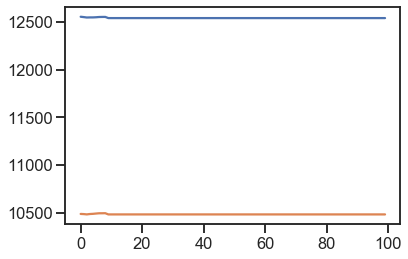

In [35]:
history_basic = model.fit(Xs, y, batch_size=batch_size, epochs=epochs,  validation_split=.3, verbose=1) #X_train, y_train,

mse = model.evaluate(X_train, y_train, verbose=False)
print("Training:", mse)

val_loss = history_basic.history['val_loss'][-1]
print("Val Acc:",val_loss)
print("Diff:", mse-val_loss)



plt.plot(history_basic.history['mean_squared_error'])
plt.plot(history_basic.history['val_loss']);

*Use GridSearchCV to optomize the model*

In [36]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    
    #reset the model 
    model = tf.keras.models.Sequential()
    # first hidden layer
    model.add(tf.keras.layers.Dense(nodes_layers[0], activation='relu', input_shape=(2313,)))
    # hidden layers 
    for s in nodes_layers[1:]:
        model.add(tf.keras.layers.Dense(units = s,  activation = 'relu', 
                                        kernel_regularizer=tf.keras.regularizers.l2(kernel_weight), 
                                        bias_regularizer=tf.keras.regularizers.l2(bias_weight) ))
        model.add(tf.keras.layers.Dropout(0.1))
    
    # output layer 
    model.add(tf.keras.layers.Dense(1,  activation='sigmoid'))


    # Compile model
    optimize = tf.keras.optimizers.Adam(learning_rate=0.0007, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mean_squared_error'])
    
    #Return model
    return model

In [38]:
# Fix random seed for reproducibility

seed = 13
np.random.seed(seed)

In [43]:
# Create model

model = KerasRegressor(build_fn=create_model, verbose=0)

In [49]:
# Define the grid search parameters

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 100, 300]
validation_split=[.1, .2, .3]
param_grid = dict(batch_size=batch_size, epochs=epochs, validation_split=validation_split)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

In [50]:
# Run Model

grid_result = grid.fit(Xs, y)

PicklingError: Could not pickle the task to send it to the workers.

In [ ]:
# Summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))